## Contents
1. security checks
2. Regional flag
3. Activity flag
4. Customer profiling
    - Age, income, pets, diets, dependants
    - Aggregation
    - Compare across regions
    - Compare across departments
5. Additional stats/analysis

# Importing Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data 

In [2]:
path = r'C:\Users\tlayt\OneDrive\Documents\CF Data Analytics\Acheivement 4\Instacart Basket Analysis'

In [3]:
#import data
IC_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_merged_all.pkl'))


# Further Analysis 

## Security Risks

In [ ]:
#creating crosstab to check days_since_prior_order hypothesis
crosstab = pd.crosstab(IC_all['days_since_prior_order'], IC_all['order_number'], dropna = False)

In [ ]:
crosstab

In [ ]:
crosstab.to_clipboard()

In [ ]:
IC_all.columns

In [5]:
#dropping first and last names due to PII concerns 
IC_all_sec = IC_all.drop(columns = ['First Name','Last Name'])

In [15]:
#dropping _merge
IC_all_sec = IC_all.drop(columns = ['_merge'])

In [16]:
#checking 
IC_all_sec.columns

Index(['order_id', 'customer_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_labels', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spending', 'spending_flag', 'med_DSPO', 'frequency_flag',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

## Region Flag

In [7]:
#create region flag
region = []
for value in IC_all_sec["State"]:
  if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
  elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
  elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
  else:
        region.append('West')


In [ ]:
#checking 
region

In [85]:
#creating new column in df
IC_all_sec['region'] = region

In [ ]:
#checking 
IC_all_sec.head()

In [9]:
#checking count
IC_all_sec['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [197]:
#comparing spending to region with crosstab
region_spending_crosstab = pd.crosstab(IC_all_sec['region'], IC_all_sec['spending_flag'], dropna = False)

In [198]:
#checking
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155932,7441350
Northeast,108180,5614511
South,209481,10582194
West,160271,8132559


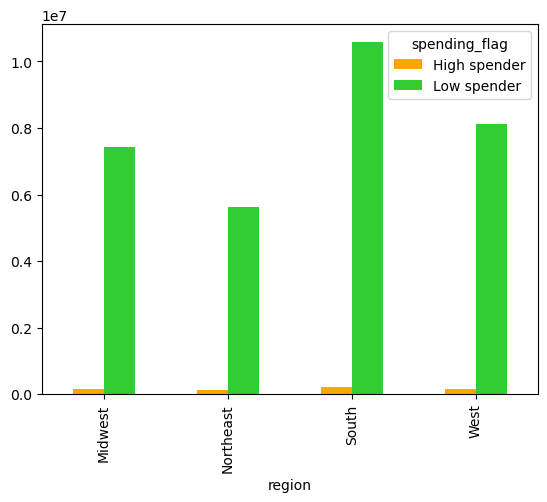

In [199]:
#creating bar gragh for region_spending
region_spending_bar = region_spending_crosstab.plot.bar( color = ['orange', 'limegreen'])

In [ ]:
#exporting image
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending_bar.png'))

## Activity Flag

In [10]:
#crating an activity flag 
IC_all_sec.loc[IC_all_sec['max_order'] < 5, 'Activity_flag'] = 'Low_activity'

In [11]:
IC_all_sec.loc[IC_all_sec['max_order'] >= 5, 'Activity_flag'] = 'High_activity'

In [12]:
#checking
IC_all_sec['Activity_flag'].value_counts()

High_activity    30964564
Low_activity      1440295
Name: Activity_flag, dtype: int64

In [ ]:
#*******creating new sub df of only high activity customers 
IC_high = IC_all_sec[IC_all_sec['Activity_flag'] == 'High_activity']

In [ ]:
#checking 
IC_high['Activity_flag'].value_counts()

In [ ]:
#exporting df 
IC_high.to_csv(os.path.join(path, '02 Data','Prepared Data', 'IC_high_activity'))

## Customer Profiling

### Age

In [19]:
#creating age profile 
IC_all_sec.loc[IC_all_sec['Age'] < 40, 'age_profile'] = 'Young'

In [20]:
IC_all_sec.loc[((IC_all_sec['Age'] >= 40) & (IC_all_sec['Age'] < 65)), 'age_profile'] = 'Middle-aged'

In [21]:
IC_all_sec.loc[IC_all_sec['Age'] >= 65, 'age_profile'] = 'Senior'

In [22]:
#checking 
IC_all_sec['age_profile'].value_counts()

Middle-aged    12665583
Young          11164192
Senior          8575084
Name: age_profile, dtype: int64

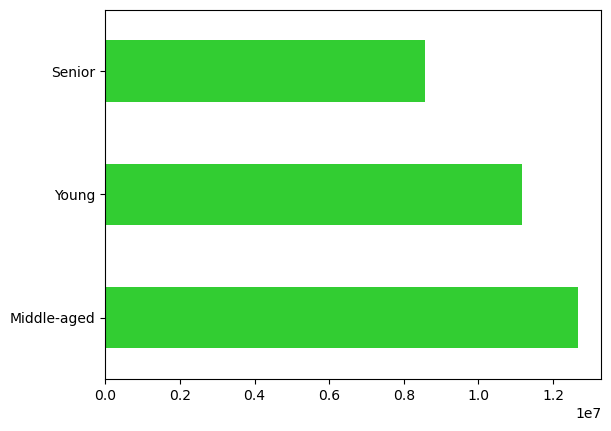

In [24]:
#creating bar chart
bar_age_prof = IC_all_sec['age_profile'].value_counts().plot.barh(color = ['limegreen'])

In [25]:
#export image
bar_age_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile.png'))

### Income

In [27]:
#income stats
IC_all_sec['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [28]:
#using median, Q1 & Q3 to create income profile
IC_all_sec.loc[IC_all_sec['income'] <=65000, 'income_profile'] = 'Low-income'

In [29]:
IC_all_sec.loc[((IC_all_sec['income'] > 65000) & (IC_all_sec['income'] <= 130000)), 'income_profile'] = 'Mid-income'

In [30]:
IC_all_sec.loc[IC_all_sec['income'] > 130000, 'income_profile'] = 'High-income'

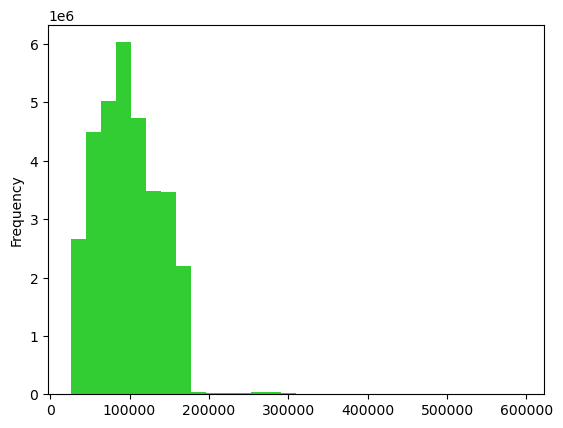

In [34]:
#creating hist
income_hist = IC_all_sec['income'].plot.hist(bins = 30, color ='limegreen')

In [37]:
#export image
income_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_income.png'))

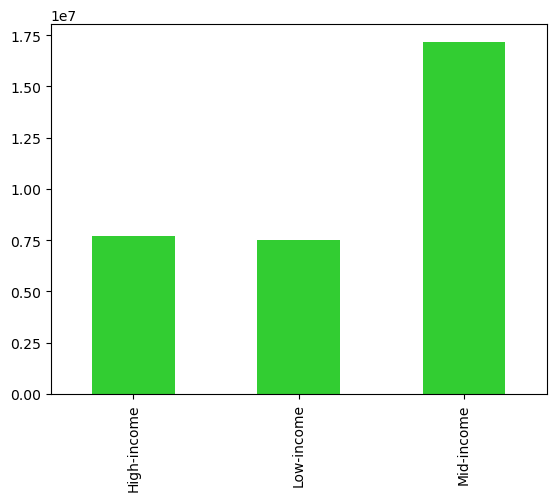

In [43]:
#creating bar of income
bar_income_prof = IC_all_sec['income_profile'].value_counts().sort_index().plot.bar( color ='limegreen')

In [44]:
#export image
bar_income_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile.png'))

### Pets

In [45]:
#creating crosstab for customer ID and department ID
Cust_dep_tab = pd.crosstab(IC_all_sec['department_id'], IC_all_sec['customer_id'], dropna = False)

In [47]:
# Assigning pet flags to users and storing it in a dictionary pet dep_id = 8
# the index starts at 0, so index 0 corresponds to dep_id=1
pet_dict = dict()
for user in Cust_dep_tab:
    workinglist = Cust_dep_tab[user].tolist()
    if workinglist[7] == 0 :     
        pet_dict[user] = 'No pet'
    else:
        pet_dict[user] = 'Has pet'

In [48]:
# Assigning user flags to the pet_flag
pet_flag = []
for user in IC_all_sec['customer_id']:
    pet_flag.append(pet_dict[user])

In [49]:
# Adding pet_flag column to as pet_profile
IC_all_sec['pet_profile'] = pet_flag

In [51]:
# Checking  pet_profile
IC_all_sec['pet_profile'].value_counts(dropna = False)

No pet     28876718
Has pet     3528141
Name: pet_profile, dtype: int64

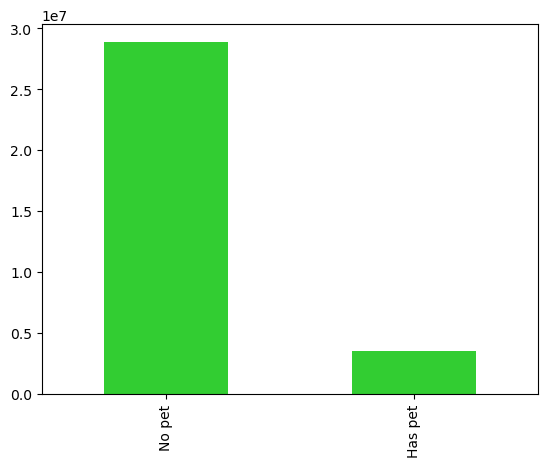

In [52]:
#creating bar of pets
bar_pet_prof = IC_all_sec['pet_profile'].value_counts().plot.bar( color ='limegreen')

In [53]:
#export image
bar_pet_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_profile.png'))

### Diet

In [54]:
# Assigning diet flags to users and storing it in a dictionary
diet_dict = dict()
for user in Cust_dep_tab:
    workinglist = Cust_dep_tab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Meat-consumer'

In [56]:
# assigning user flags to the list
diet_list = []
for user in IC_all_sec['customer_id']:
    diet_list.append(diet_dict[user])

In [59]:
# Adding diet_flag column to as diet_profile
IC_all_sec['diet_profile'] = diet_list

In [60]:
# checking diet profile
IC_all_sec['diet_profile'].value_counts(dropna = False)

Meat-consumer    23762619
Vegetarian        8258813
Vegan              383427
Name: diet_profile, dtype: int64

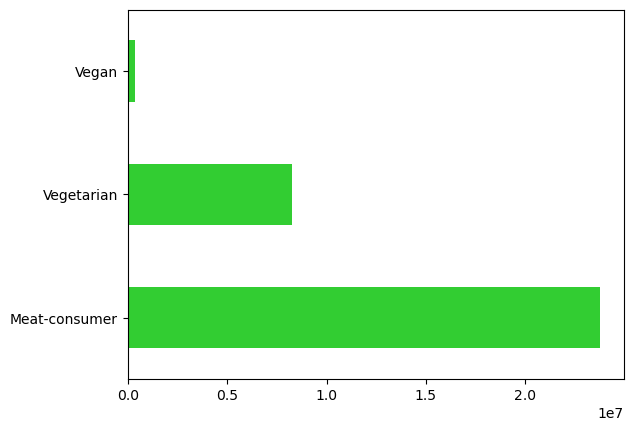

In [61]:
#creating bar of diet
bar_diet_prof = IC_all_sec['diet_profile'].value_counts().plot.barh( color ='limegreen')

In [62]:
#export image
bar_diet_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_profile.png'))

### Dependants 

In [65]:
# Creating a crosstab between dependants and martial_status
family_tab = pd.crosstab(IC_all_sec['fam_status'], IC_all_sec['n_dependants'], dropna = False)

In [66]:
family_tab

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


We can see that the all singles and divorcer/widowed have no dependants. And all who are married have dependants. 

In [67]:
#creating family profile
IC_all_sec.loc[(IC_all_sec['n_dependants'] == 0), 'dependants'] = 'No dependants'

In [68]:
IC_all_sec.loc[(IC_all_sec['n_dependants'] >= 1), 'dependants'] = 'Has dependants'

In [69]:
#checking 
IC_all_sec['dependants'].value_counts(dropna = False)

Has dependants    24307356
No dependants      8097503
Name: dependants, dtype: int64

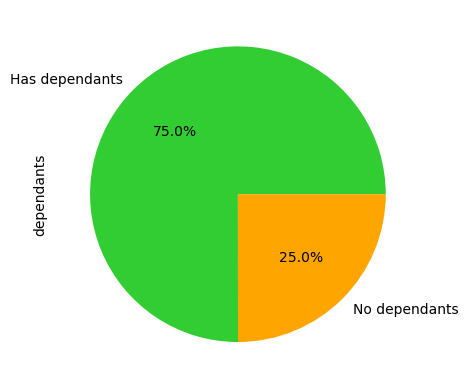

In [73]:
#creating pie chart 
dependants_pie = IC_all_sec['dependants'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['limegreen','orange'])


In [74]:
#export image
dependants_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_pie.png'))

## Aggregation

In [76]:
# age_profile stats
IC_all_sec.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'orders_day_of_week': ['mean', 'max', 'min'], 'order_hour_of_day': ['mean', 'max', 'min']})

days_since_prior_order            orders_day_of_week          \
                              mean   max  min               mean max min   
age_profile                                                                
Middle-aged              11.117805  30.0  0.0           2.741919   6   0   
Senior                   11.078641  30.0  0.0           2.745084   6   0   
Young                    11.108046  30.0  0.0           2.730629   6   0   

            order_hour_of_day          
                         mean max min  
age_profile                            
Middle-aged         13.436320  23   0  
Senior              13.426524  23   0  
Young               13.411419  23   0

In [78]:
# income_profile stats
IC_all_sec.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'orders_day_of_week': ['mean', 'max', 'min'], 'order_hour_of_day': ['mean', 'max', 'min']})

days_since_prior_order            orders_day_of_week          \
                                 mean   max  min               mean max min   
income_profile                                                                
High-income                 11.012961  30.0  0.0           2.740252   6   0   
Low-income                  11.340582  30.0  0.0           2.740563   6   0   
Mid-income                  11.042033  30.0  0.0           2.737502   6   0   

               order_hour_of_day          
                            mean max min  
income_profile                            
High-income            13.462716  23   0  
Low-income             13.317605  23   0  
Mid-income             13.455381  23   0

In [79]:
# pets_profile stats
IC_all_sec.groupby('pet_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'orders_day_of_week': ['mean', 'max', 'min'], 'order_hour_of_day': ['mean', 'max', 'min']})

days_since_prior_order            orders_day_of_week          \
                              mean   max  min               mean max min   
pet_profile                                                                
Has pet                  10.327303  30.0  0.0           2.828543   6   0   
No pet                   11.200417  30.0  0.0           2.727910   6   0   

            order_hour_of_day          
                         mean max min  
pet_profile                            
Has pet             13.505297  23   0  
No pet              13.415356  23   0

In [80]:
# diet_profile stats
IC_all_sec.groupby('diet_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'orders_day_of_week': ['mean', 'max', 'min'], 'order_hour_of_day': ['mean', 'max', 'min']})

days_since_prior_order            orders_day_of_week          \
                                mean   max  min               mean max min   
diet_profile                                                                 
Meat-consumer              10.762605  30.0  0.0           2.726927   6   0   
Vegan                      14.749275  30.0  0.0           2.841495   6   0   
Vegetarian                 11.952600  30.0  0.0           2.768456   6   0   

              order_hour_of_day          
                           mean max min  
diet_profile                             
Meat-consumer         13.480948  23   0  
Vegan                 13.006408  23   0  
Vegetarian            13.284042  23   0

In [81]:
# dependants_profile stats
IC_all_sec.groupby('dependants').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'orders_day_of_week': ['mean', 'max', 'min'], 'order_hour_of_day': ['mean', 'max', 'min']})

days_since_prior_order            orders_day_of_week          \
                                 mean   max  min               mean max min   
dependants                                                                    
Has dependants              11.111834  30.0  0.0           2.740545   6   0   
No dependants               11.080805  30.0  0.0           2.733830   6   0   

               order_hour_of_day          
                            mean max min  
dependants                                
Has dependants         13.422517  23   0  
No dependants          13.433048  23   0

## Comparing profiles with regions

In [104]:
# Creating a crosstab comparing 'age_profile' and 'region'
age_region_cross = pd.crosstab(IC_all_sec['region'], IC_all_sec['age_profile'])

In [105]:
age_region_cross

age_profile,Middle-aged,Senior,Young
region,,,
Midwest,3005352,1990844,2601129
Northeast,2209479,1553903,1959354
South,4179885,2836257,3775743
West,3270867,2194080,2827966


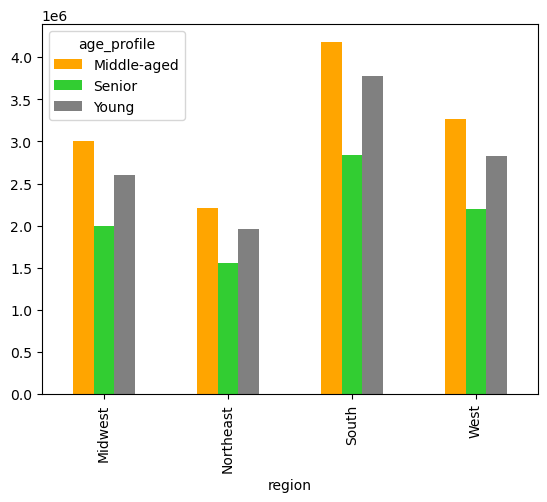

In [106]:
#creating bar gragh for age_region_cross
age_region_crossbar = age_region_cross.plot.bar( color = ['orange', 'limegreen','grey','darkgreen'])

In [107]:
#export image
age_region_crossbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_crossbar.png'))

In [101]:
# Creating a crosstab comparing 'income_profile' and 'region'
income_region_cross = pd.crosstab(IC_all_sec['region'], IC_all_sec['income_profile'])

In [102]:
income_region_cross

income_profile,High-income,Low-income,Mid-income
region,,,
Midwest,1835777,1737985,4023563
Northeast,1367168,1317307,3038261
South,2546153,2532055,5713677
West,1964430,1933846,4394637


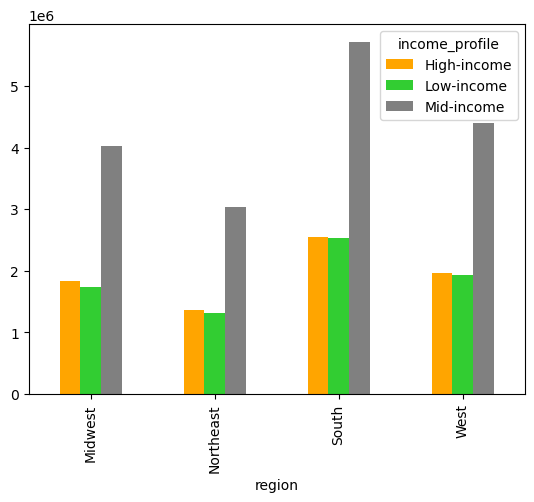

In [103]:
#creating bar gragh for income_region_cross
income_region_cross = income_region_cross.plot.bar( color = ['orange', 'limegreen','grey','darkgreen'])

In [108]:
#export image
income_region_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_cross.png'))


In [109]:
# Creating a crosstab comparing 'pets_profile' and 'region'
pets_region_cross = pd.crosstab(IC_all_sec['region'], IC_all_sec['pet_profile'])

In [110]:
pets_region_cross

pet_profile,Has pet,No pet
region,,
Midwest,844548,6752777
Northeast,612439,5110297
South,1141742,9650143
West,929412,7363501


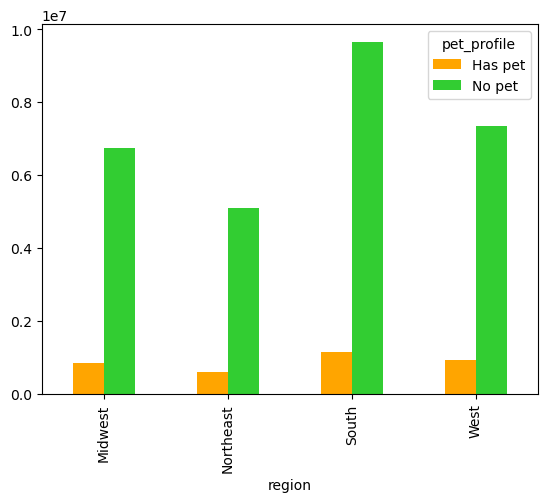

In [111]:
#creating bar gragh for pets_region_cross
pets_region_cross = pets_region_cross.plot.bar( color = ['orange', 'limegreen'])

In [112]:
#export image
pets_region_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pets_region_cross.png'))

In [113]:
# Creating a crosstab comparing 'diet_profile' and 'region'
diet_region_cross = pd.crosstab(IC_all_sec['region'], IC_all_sec['diet_profile'])

In [114]:
diet_region_cross

diet_profile,Meat-consumer,Vegan,Vegetarian
region,,,
Midwest,5552184,90293,1954848
Northeast,4201008,67764,1453964
South,7914729,125305,2751851
West,6094698,100065,2098150


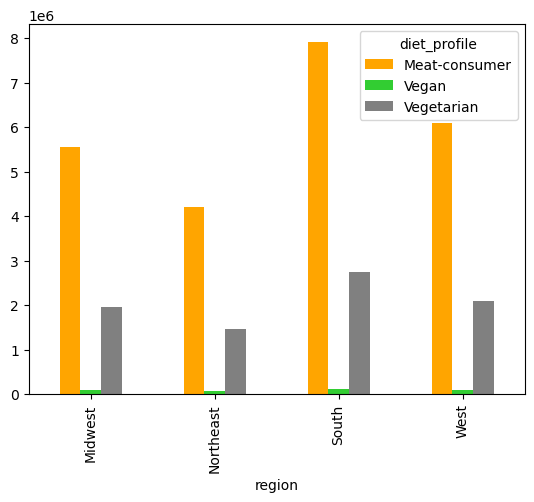

In [115]:
#creating bar gragh for diet_region_cross
diet_region_cross = diet_region_cross.plot.bar( color = ['orange', 'limegreen','grey'])

In [116]:
#export image
diet_region_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_region_cross.png'))

In [117]:
# Creating a crosstab comparing 'dependants' and 'region'
dependants_region_cross = pd.crosstab(IC_all_sec['region'], IC_all_sec['dependants'])

In [118]:
dependants_region_cross

dependants,Has dependants,No dependants
region,,
Midwest,5692125,1905200
Northeast,4304435,1418301
South,8090226,2701659
West,6220570,2072343


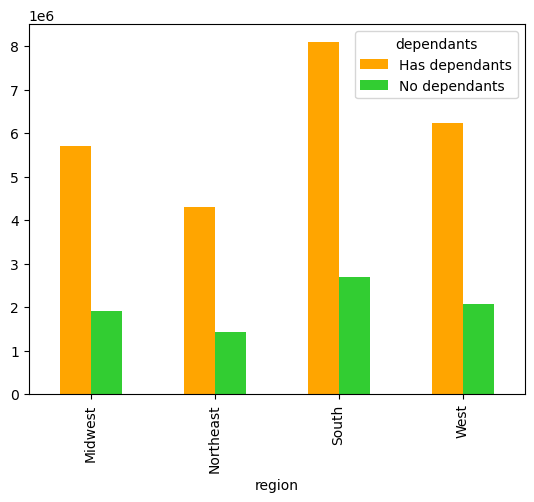

In [119]:
#creating bar gragh for dependants_region_cross
dependants_region_cross = dependants_region_cross.plot.bar( color = ['orange', 'limegreen'])

In [120]:
#export image
dependants_region_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_region_cross.png'))

## Departments

In [122]:
# Import department.csv
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [123]:
#checking
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [124]:
# Rename Unamed as department_id
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [125]:
#creating dep dictionary
dept_dict = dict(zip(df_dep["department_id"], df_dep["department"]))

In [126]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [127]:
# Create a column to add the department name to df
IC_all_sec['department'] = IC_all_sec['department_id'].map(dept_dict)

In [128]:
#checking
IC_all_sec['department']

0              beverages
1              beverages
2              beverages
3              beverages
4              beverages
                ...     
32404854       beverages
32404855    meat seafood
32404856    meat seafood
32404857    meat seafood
32404858    meat seafood
Name: department, Length: 32404859, dtype: object

In [131]:
# Creating a crosstab comparing 'departments' and 'region'
departments_region_cross = pd.crosstab(IC_all_sec['department'], IC_all_sec['region'])

In [132]:
departments_region_cross

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


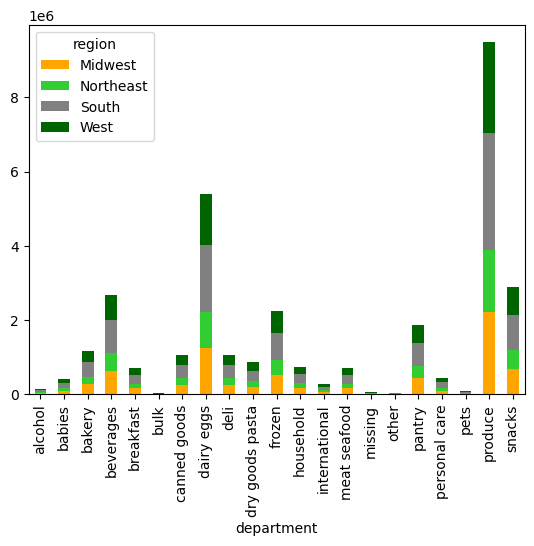

In [133]:
#creating bar gragh for departments_region_cross
departments_region_cross = departments_region_cross.plot.bar( stacked = True, color = ['orange', 'limegreen','grey','darkgreen'])

In [134]:
#exporting image
departments_region_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_region_cross.png'))

In [139]:
# Creating a crosstab comparing 'department' and 'age'
age_department_cross = pd.crosstab(IC_all_sec['department'], IC_all_sec['age_profile'])

In [140]:
age_department_cross

age_profile,Middle-aged,Senior,Young
department,,,
alcohol,59771,39036,54889
babies,167984,109445,146373
bakery,458686,309522,404220
beverages,1059131,714832,914160
breakfast,275947,183844,243242
bulk,13329,9242,12002
canned goods,416382,282438,369238
dairy eggs,2102456,1426213,1870078
deli,411631,277618,362000


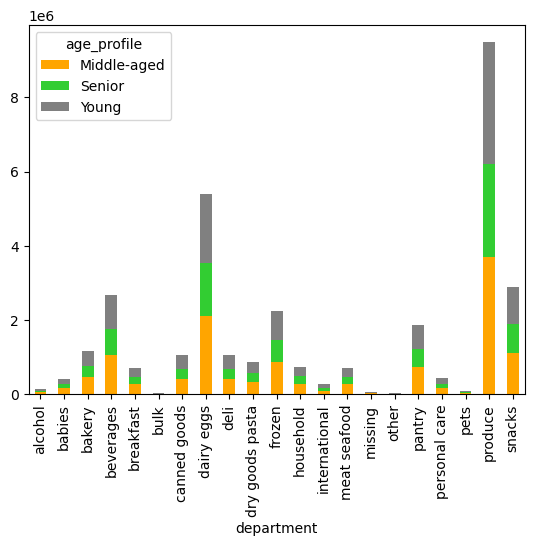

In [142]:
#creating bar gragh for departments_region_cross
age_department_cross = age_department_cross.plot.bar( stacked = True, color = ['orange', 'limegreen','grey',])

In [143]:
#exporting image
age_department_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_cross.png'))

In [190]:
# Creating a crosstab comparing 'department' and 'income_profile'
department_income_cross = pd.crosstab(IC_all_sec['department'], IC_all_sec['income_profile'])

In [191]:
department_income_cross

income_profile,High-income,Low-income,Mid-income
department,,,
alcohol,41241,37371,75084
babies,105097,77197,241508
bakery,288754,255822,627852
beverages,613891,731104,1343128
breakfast,162424,184191,356418
bulk,7552,9133,17888
canned goods,266525,215224,586309
dairy eggs,1307701,1182757,2908289
deli,250698,240958,559593


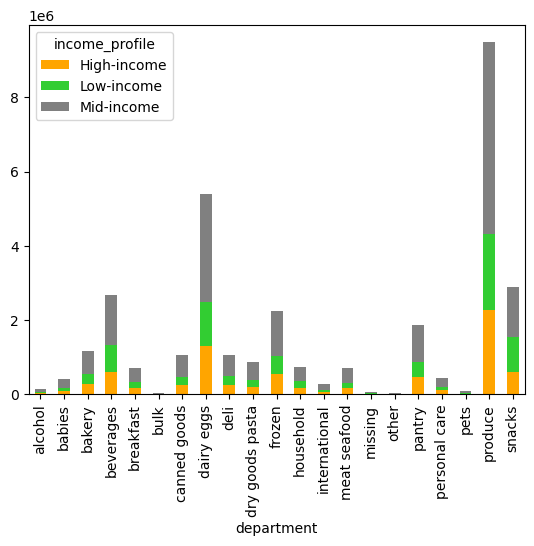

In [192]:
#creating bar gragh for departments_region_cross
department_income_cross = department_income_cross.plot.bar( stacked = True, color = ['orange', 'limegreen','grey',])

In [147]:
#exporting image
department_income_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_income_cross.png'))

In [148]:
# Creating a crosstab comparing 'department' and 'dependants'
department_dependants_cross = pd.crosstab(IC_all_sec['department'], IC_all_sec['dependants'])

In [149]:
department_dependants_cross

dependants,Has dependants,No dependants
department,,
alcohol,114578,39118
babies,317308,106494
bakery,878023,294405
beverages,2013681,674442
breakfast,528456,174577
bulk,26295,8278
canned goods,803220,264838
dairy eggs,4049385,1349362
deli,786104,265145


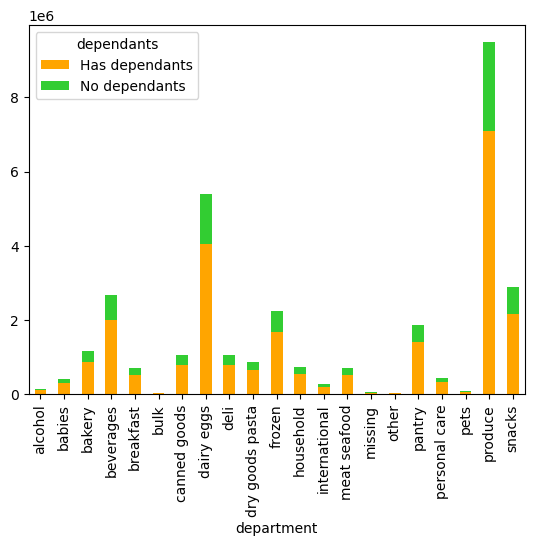

In [150]:
#creating bar gragh for departments_region_cross
department_dependants_cross = department_dependants_cross.plot.bar( stacked = True, color = ['orange', 'limegreen'])

In [151]:
#exporting image
department_dependants_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_dependants_cross.png'))

## Additional Stats

In [211]:
# Creating a crosstab comparing 'department' and 'loyalty_flag'
department_loyalty_cross = pd.crosstab(IC_all_sec['department'], IC_all_sec['loyalty_flag'])

In [212]:
department_loyalty_cross

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


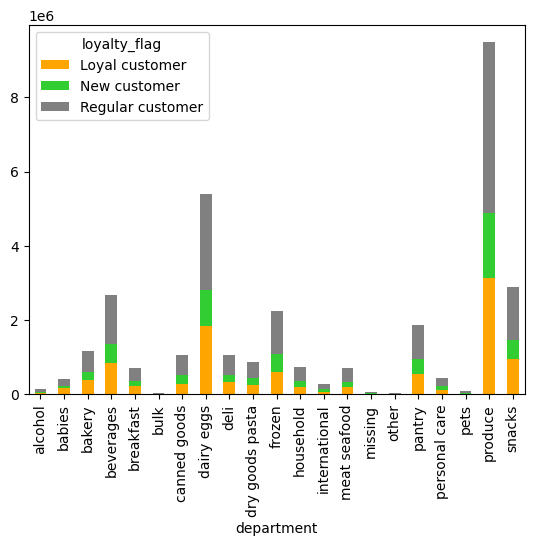

In [213]:
#creating bar gragh for departments_region_cross
department_loyalty_cross = department_loyalty_cross.plot.bar(stacked = True, color = ['orange', 'limegreen','grey',])


In [155]:
#exporting image
department_loyalty_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_loyalty_cross.png'))

In [163]:
# Creating a crosstab comparing 'loyalty' and 'region'
loyalty_region_cross = pd.crosstab(IC_all_sec['region'], IC_all_sec['loyalty_flag'])

In [164]:
loyalty_region_cross

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


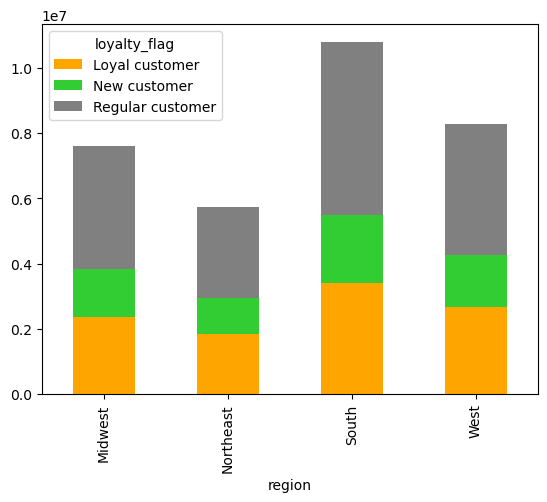

In [165]:
#creating bar gragh for loyalty_region_cross
loyalty_region_cross = loyalty_region_cross.plot.bar(stacked = True, color = ['orange', 'limegreen','grey'])


In [170]:
#exporting image
loyalty_region_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_region_cross.png'))

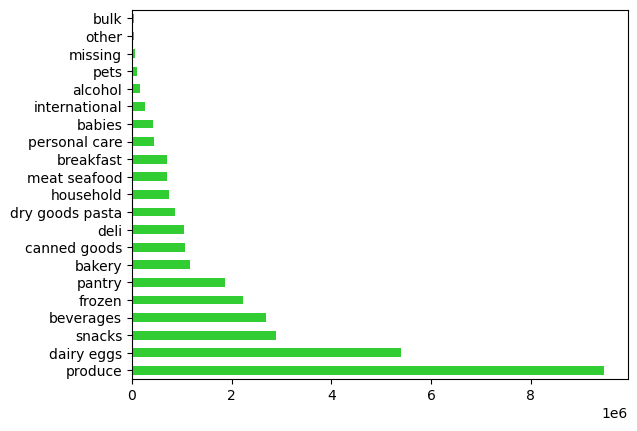

In [173]:
# popular departments
bar_department = IC_all_sec['department'].value_counts().plot.barh(color = ['limegreen'])

In [174]:
#exporting image
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department.png'))

In [176]:
# Creating a crosstab comparing 'loyalty' and 'price_ranges'
loyalty_price_cross = pd.crosstab(IC_all_sec['price_labels'], IC_all_sec['loyalty_flag'])

In [177]:
loyalty_price_cross

loyalty_flag,Loyal customer,New customer,Regular customer
price_labels,,,
High-range product,119936,85652,212090
Low-range product,3214690,1952769,4958862
Mid-range product,6949467,4205569,10705824


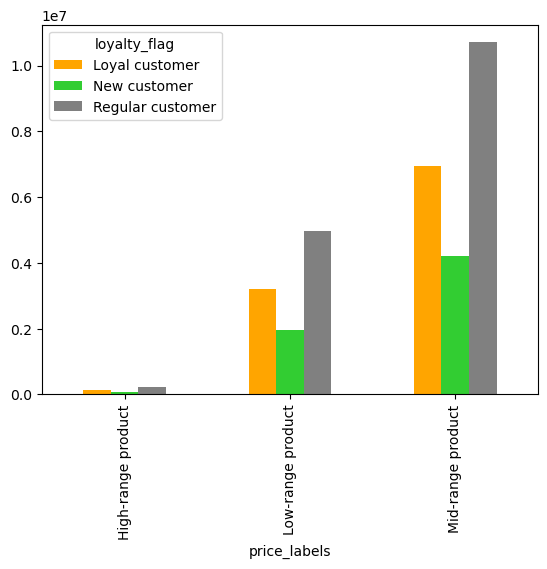

In [178]:
#creating bar gragh for loyalty_price_cross
loyalty_price_cross = loyalty_price_cross.plot.bar(color = ['orange', 'limegreen','grey'])


In [179]:
#exporting image
loyalty_price_cross.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_price_cross.png'))

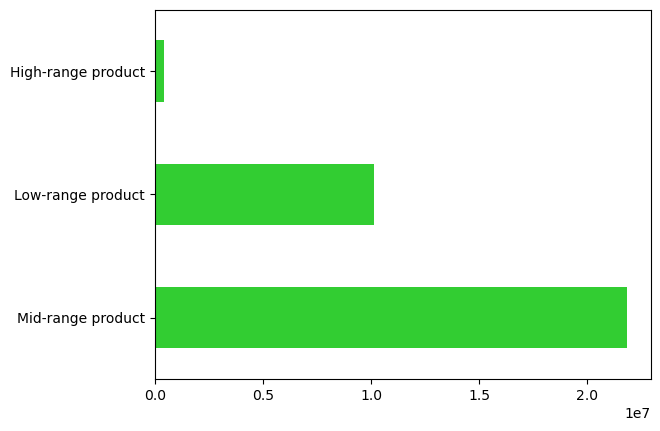

In [183]:
bar_prices = IC_all_sec['price_labels'].value_counts().plot.barh(color = ['limegreen'])

In [184]:
#exporting image
bar_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_prices_labels.png'))

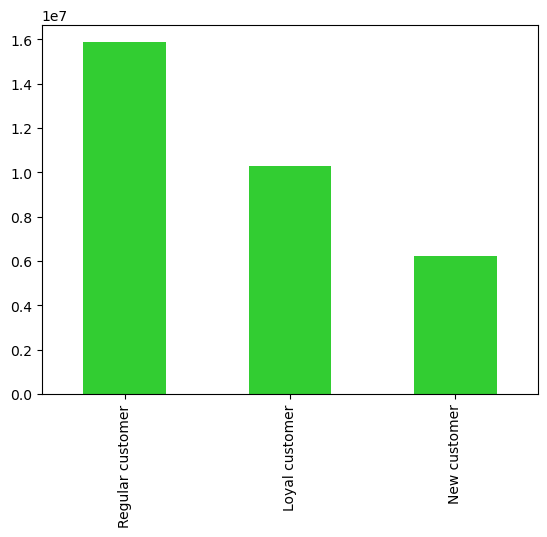

In [195]:
bar_loyalty = IC_all_sec['loyalty_flag'].value_counts().plot.bar(color = ['limegreen'])

In [121]:
# Export data to pkl
IC_all_sec.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'IC_all_sec.pkl'))
